# Two pendulum animations (using %matplotlib notebook)

Use Pendulum class to generate basic pendulum animations.  Uses the `%matplotlib notebook` backend for Jupyter notebooks to display the animation as real-time updates with `animation.FuncAnimation` (as opposed to making a movie, see the pendulum_animation_notebook_inline versions for an alternative).

Extends pendulum_animation_notebook_v2.ipynb to allow for more than one pendulum.

* v1: Last revised 10-Feb-2019 by Dick Furnstahl (furnstahl.1@osu.edu).


In [104]:
%matplotlib notebook

In [105]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy import linalg as LA 

import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [106]:
# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 10
plt.rcParams.update({'font.size': font_size})

## Pendulum class and utility functions

In [107]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [108]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [109]:
class DoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
   

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self,g=1,m1=1,m2=1,l1=1,l2=1,p1_0=1,p1d_0=1,p2_0=1,p2d_0=1
                ):
        
        self.g = g
        self.m1 = m1
        self.m2 = m2
        self.l1 = l1
        self.l2 = l2
        self.phi1_0 = p1_0
        self.phi1_dot_0 = p1d_0
        self.phi2_0 = p2_0
        self.phi2_dot_0 = p2d_0
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi1(t) and y[1] = dphi1/dt
                                      y[2] = phi2(t) and y[3] = dphi2/dt
            
        Returns
        -------
        
        """
      
        return [
            y[1],
            (-1*(self.g*(2*self.m1 + self.m2)*np.sin(y[0]) + self.m2*self.g*np.sin(y[0]-y[2]) + \
                self.m2*self.l1*np.sin(2*(y[0]-y[2]))*(y[1]**2) + 2*self.m2*self.l2*(y[3]**2)*np.sin(y[0]-y[2]))) /
            2*self.l1*(self.m1+self.m2-self.m2*(np.cos(y[0]-y[2])**2)),
            y[3],
            np.sin(y[0]-y[2])*((self.m1+self.m2)*self.g*np.cos(y[0]) + (self.m1+self.m2)*self.l1*(y[1]**2) + \
                self.m2*self.l2*np.cos(y[0]-y[2])*(y[3]**2))
            /
            self.l2*(self.m1+self.m2-self.m2*(np.cos(y[0]-y[2])**2))
            ]
    
    def solve_ode(self, t_pts, ph1_0, phi1_dot_0, phi2_0, phi2_dot_0, 
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot, phi2, phi2_dot = solution.y
        return phi1, phi1_dot, phi2, phi2_dot

In [110]:
phi1_0 = np.pi/2
phi1_dot_0 = 0.
phi2_0 = np.pi-0.001
phi2_dot_0 = 0.

p1 = DoublePendulum(p1_0=phi1_0,p1d_0=phi1_dot_0,p2_0=phi2_0,p2d_0=phi2_dot_0)

In [ ]:
t_start = 0.0
t_end = 100.0
delta_t = 0.01
t_pts = np.arange(t_start, t_end+delta_t, delta_t) 
phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts,phi1_0,phi1_dot_0,phi2_0,phi2_dot_0)

In [ ]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi_i(t)$')

fig = plt.figure(figsize=(10,5))
start, stop = start_stop_indices(t_pts, t_start, t_end)
ax_a = fig.add_subplot(1,1,1)

plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi1(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=None, 
            title=r'$\phi_1(t)$' + ' and ' + '$\phi_2(t)$', 
            ax=ax_a)  

## We'll now change phi2_0 by 0.0001 and watch how it all changes

In [100]:
phi2_0 = np.pi-0.001

<IPython.core.display.Javascript object>


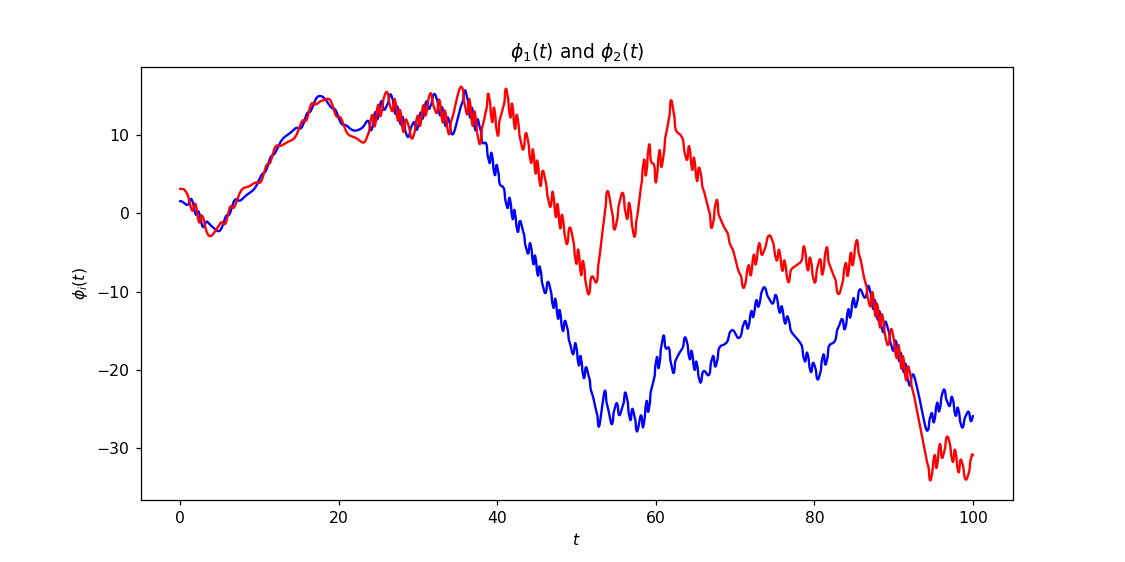

(<matplotlib.axes._subplots.AxesSubplot at 0x11824ef0c08>,
 <matplotlib.lines.Line2D at 0x1181ff97e48>)

In [101]:
p1 = DoublePendulum(p1_0=phi1_0,p1d_0=phi1_dot_0,p2_0=phi2_0,p2d_0=phi2_dot_0)

t_start = 0.0
t_end = 100.0
delta_t = 0.01
t_pts = np.arange(t_start, t_end+delta_t, delta_t) 
phi1, phi1_dot, phi2, phi2_dot = p1.solve_ode(t_pts,phi1_0,phi1_dot_0,phi2_0,phi2_dot_0)

# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi_i(t)$')

fig = plt.figure(figsize=(10,5))
start, stop = start_stop_indices(t_pts, t_start, t_end)
ax_a = fig.add_subplot(1,1,1)

plot_y_vs_x(t_pts[start : stop], phi1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi1(t)$', 
            ax=ax_a)
plot_y_vs_x(t_pts[start : stop], phi2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='red',
            label=None, 
            title=r'$\phi_1(t)$' + ' and ' + '$\phi_2(t)$', 
            ax=ax_a)  

## The end result is a completely different solution, winding up many CW rotations away from the first result